In [ ]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "sakshigoyal7/credit-card-customers"
!unzip credit-card-customers.zip

cp: cannot stat '../kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 65.2MB/s]
Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


In [ ]:
import pandas as pd

data = pd.read_csv('BankChurners.csv')
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [ ]:
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
          inplace=True, errors='ignore')


In [ ]:
print(data.columns)


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
from sklearn.preprocessing import LabelEncoder

replace_mappings = {
    'Gender': {'M': 1, 'F': 0},
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Education_Level': {
        'Unknown': 0, 'Uneducated': 1, 'High School': 2,
        'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
    }
}

for column, mapping in replace_mappings.items():
    data[column] = data[column].replace(mapping)

columns_to_encode = ['Marital_Status', 'Income_Category', 'Card_Category']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<ipython-input-6-c84c70b34a3e>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)


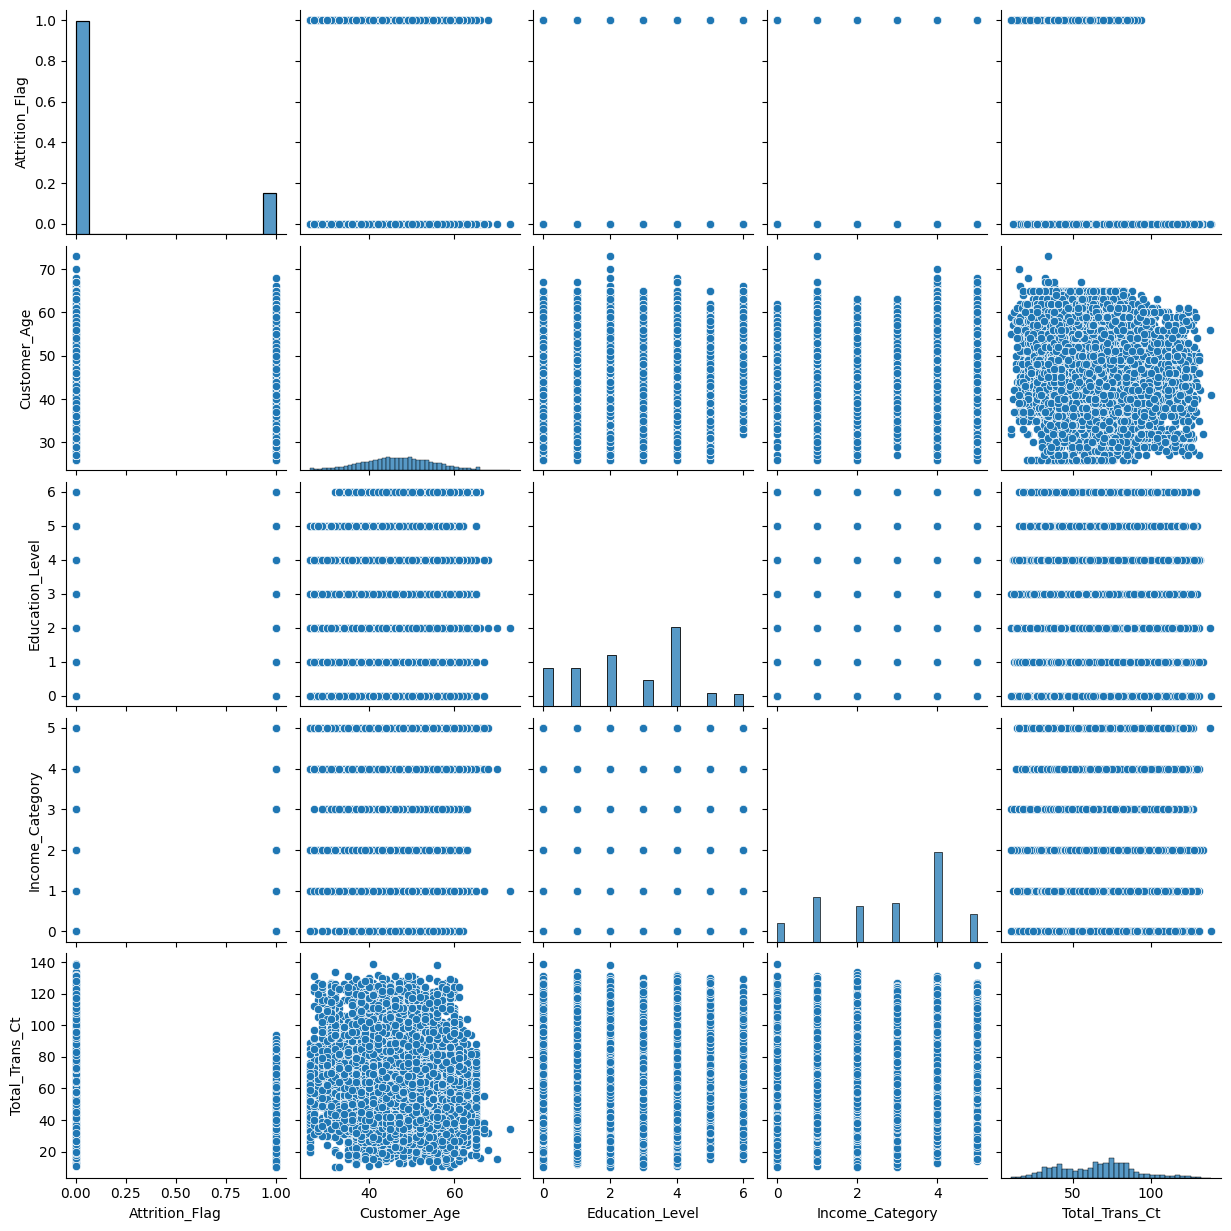

In [ ]:
import seaborn as sns
sns.pairplot(data[['Attrition_Flag', 'Customer_Age', 'Education_Level', 'Income_Category', 'Total_Trans_Ct']])

<Axes: >

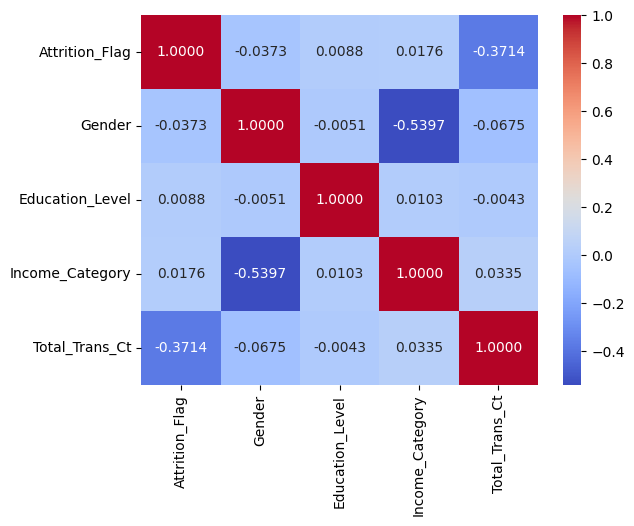

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data[['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Total_Trans_Ct']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".4f")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.isnull().values.any()

False

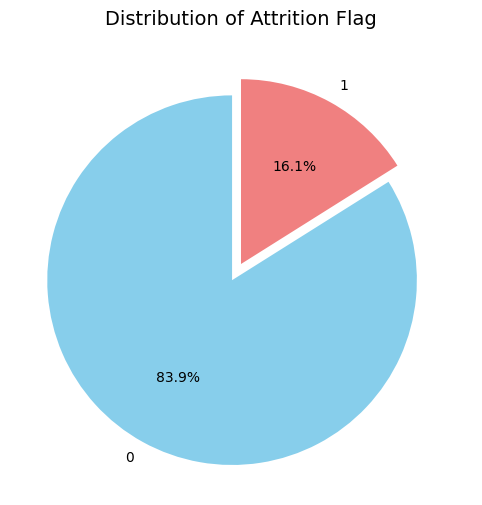

In [ ]:
import matplotlib.pyplot as plt
category_counts = data['Attrition_Flag'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.1, 0]
)
plt.title('Distribution of Attrition Flag', fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

Y = data.iloc[:, 1]
X = data.drop(columns=data.columns[1])

In [ ]:
Y

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0
...,...
10122,0
10123,1
10124,1
10125,1


In [ ]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,2,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,4,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,4,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,2,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,1,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,4,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,1,2,0,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,0,1,2,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,1,2,4,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
indices = Y.index

train_indices, test_indices = train_test_split(indices, test_size=0.2, stratify=Y, random_state=93)
X_train, Y_train = X.loc[train_indices], Y.loc[train_indices]
X_test, Y_test = X.loc[test_indices], Y.loc[test_indices]

test_indices, val_indices = train_test_split(test_indices, test_size=0.25, random_state=93)
X_test, Y_test = X.loc[test_indices], Y.loc[test_indices]
X_val, Y_val = X.loc[val_indices], Y.loc[val_indices]

In [ ]:
len(X_test)

1519

In [ ]:
len(X_val)

507

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': ['balanced', None],
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=93), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test_scaled)
Y_val_pred = best_model.predict(X_val_scaled)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}


In [ ]:
print(best_model)

LogisticRegression(C=0.1, max_iter=2000, random_state=93, solver='liblinear',
                   tol=0.001)


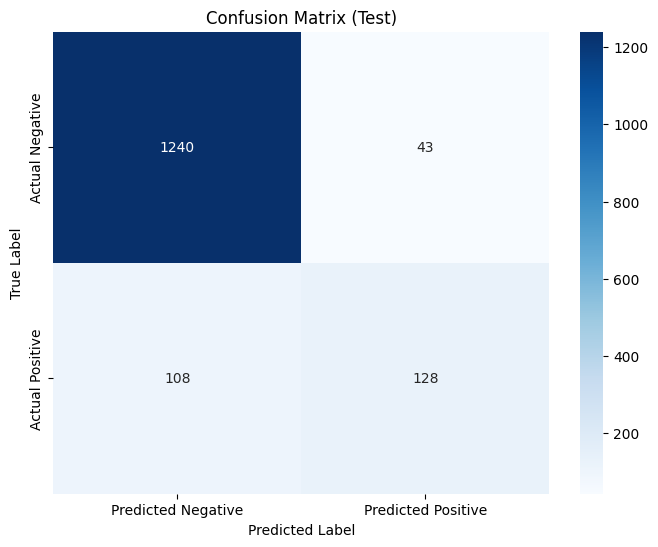

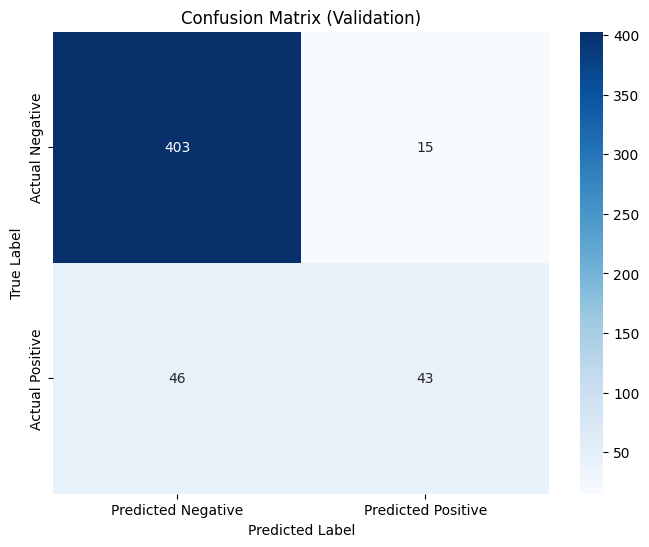

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_test = confusion_matrix(Y_test, Y_pred)
cm_val = confusion_matrix(Y_val, Y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Test)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Validation)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score

precision_test = precision_score(Y_test, Y_pred)
recall_test = recall_score(Y_test, Y_pred)
balanced_accuracy_test = balanced_accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average='weighted')

precision_val = precision_score(Y_val, Y_val_pred)
recall_val = recall_score(Y_val, Y_val_pred)
balanced_accuracy_val = balanced_accuracy_score(Y_val, Y_val_pred)
f2 = f1_score(Y_val, Y_val_pred, average='weighted')

print(f"F1 Score test: {f1:.2f}")
print(f"Precision Test: {precision_test}")
print(f"Recall Test: {recall_test}")
print(f"Balanced Accuracy Test: {balanced_accuracy_test}")
print(f"F1 Score Validation: {f2:.2f}")
print(f"Precision Validation: {precision_val}")
print(f"Recall Validation: {recall_val}")
print(f"Balanced Accuracy Validation: {balanced_accuracy_val}")

F1 Score test: 0.89
Precision Test: 0.7485380116959064
Recall Test: 0.5423728813559322
Balanced Accuracy Test: 0.7544288413015047
F1 Score Validation: 0.87
Precision Validation: 0.7413793103448276
Recall Validation: 0.48314606741573035
Balanced Accuracy Validation: 0.7236304499758077


Best Parameters (Balanced Data): {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


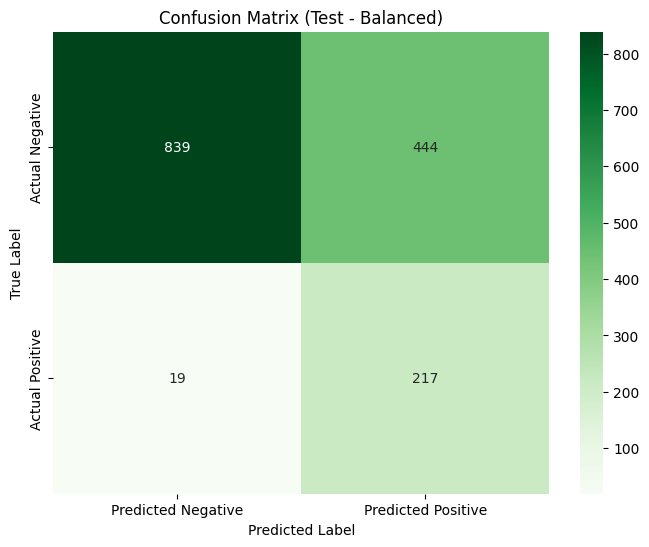

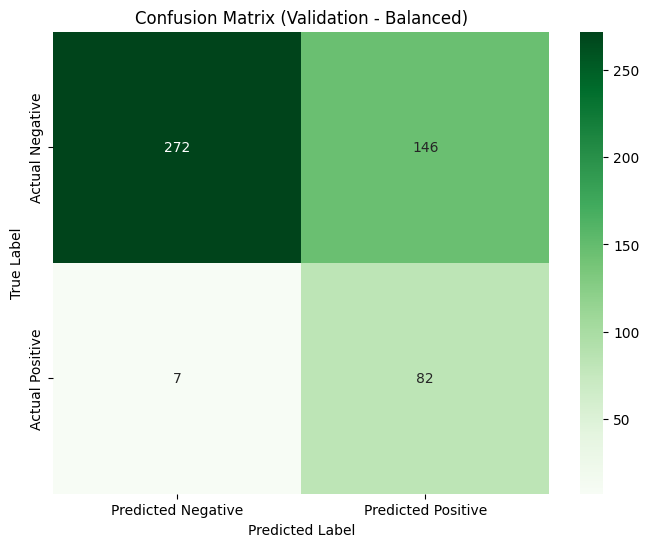

Classification Report (Test - Original Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1283
           1       0.75      0.54      0.63       236

    accuracy                           0.90      1519
   macro avg       0.83      0.75      0.79      1519
weighted avg       0.89      0.90      0.89      1519


Classification Report (Test - Balanced Data):
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1283
           1       0.33      0.92      0.48       236

    accuracy                           0.70      1519
   macro avg       0.65      0.79      0.63      1519
weighted avg       0.88      0.70      0.74      1519



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

smote = SMOTE(random_state=93)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

grid_search_balanced = GridSearchCV(LogisticRegression(max_iter=2000, random_state=93), param_grid, cv=5, n_jobs=-1)
grid_search_balanced.fit(X_train_balanced_scaled, Y_train_balanced)
best_model_balanced = grid_search_balanced.best_estimator_

Y_pred_balanced = best_model_balanced.predict(X_test_scaled)
Y_val_pred_balanced = best_model_balanced.predict(X_val_scaled)

print(f"Best Parameters (Balanced Data): {grid_search_balanced.best_params_}")

cm_test_balanced = confusion_matrix(Y_test, Y_pred_balanced)
cm_val_balanced = confusion_matrix(Y_val, Y_val_pred_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_balanced, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Test - Balanced)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_balanced, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Validation - Balanced)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report (Test - Original Data):")
print(classification_report(Y_test, Y_pred))
print("\nClassification Report (Test - Balanced Data):")
print(classification_report(Y_test, Y_pred_balanced))


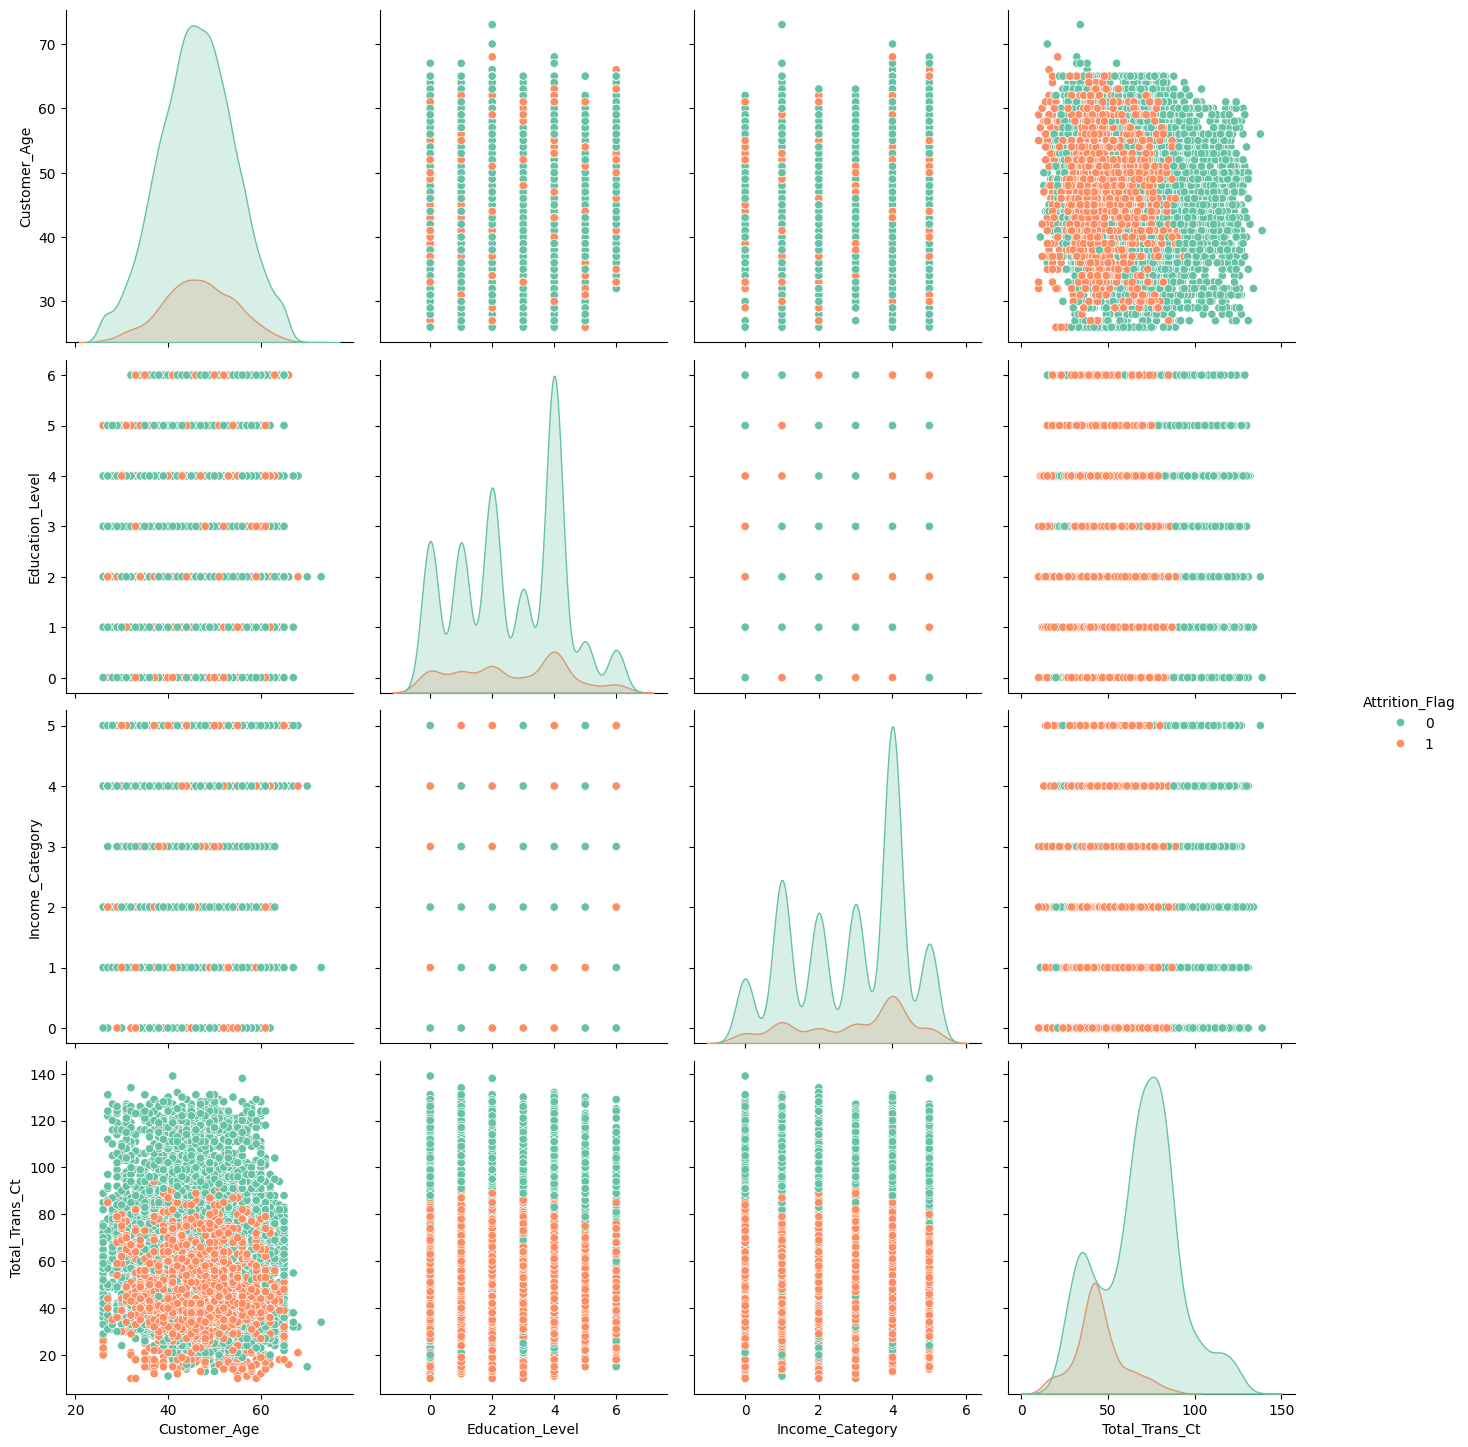

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Attrition_Flag', 'Customer_Age', 'Education_Level', 'Income_Category', 'Total_Trans_Ct']
data_plot = data.copy()
data_plot['Attrition_Flag'] = Y

sns.pairplot(data=data_plot[columns_to_plot], hue='Attrition_Flag', diag_kind='kde', palette='Set2')
plt.gcf().set_size_inches(15, 15)
plt.show()
